In [43]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.linear_model import LinearRegression

IMPORTATION DU FICHIER

In [3]:
df = pd.read_csv("data\winequality.csv")

<>:1: SyntaxWarning: invalid escape sequence '\w'
<>:1: SyntaxWarning: invalid escape sequence '\w'
C:\Users\josep\AppData\Local\Temp\ipykernel_21316\1404904686.py:1: SyntaxWarning: invalid escape sequence '\w'
  df = pd.read_csv("data\winequality.csv")


info et lecture des premiere lignes 

In [4]:

print(df.info)
df.head(2)

<bound method DataFrame.info of        type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0     white            7.0             0.270         0.36            20.7   
1     white            6.3             0.300         0.34             1.6   
2     white            8.1             0.280         0.40             6.9   
3     white            7.2             0.230         0.32             8.5   
4     white            7.2             0.230         0.32             8.5   
...     ...            ...               ...          ...             ...   
6492    red            6.2             0.600         0.08             2.0   
6493    red            5.9             0.550         0.10             2.2   
6494    red            6.3             0.510         0.13             2.3   
6495    red            5.9             0.645         0.12             2.0   
6496    red            6.0             0.310         0.47             3.6   

      chlorides  free sulfur dioxide  total

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.994,3.3,0.49,9.5,6


Nettoyage

doublons et NA

In [5]:

df.dropna(inplace= True)
df.isna().sum()
df.duplicated().sum()
df.drop_duplicates(inplace=True)

Verification lignes et colonnes

In [6]:
df.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

statistique descriptives

In [7]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,5295.000000,5295.000000,5295.000000,5295.000000,5295.000000,5295.000000,5295.000000,5295.000000,5295.000000,5295.000000,5295.000000,5295.000000
mean,7.218008,0.344021,0.318782,5.051029,0.056690,30.046837,114.118225,0.994536,3.224385,0.533199,10.550154,5.796034
std,1.320690,0.168237,0.147112,4.500641,0.036901,17.827151,56.787187,0.002969,0.160155,0.149851,1.186533,0.880005
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.240000,1.800000,0.038000,16.000000,74.000000,0.992200,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.300000,0.310000,2.700000,0.047000,28.000000,116.000000,0.994670,3.210000,0.510000,10.400000,6.000000
75%,7.700000,0.410000,0.400000,7.500000,0.066000,41.000000,154.000000,0.996780,3.330000,0.600000,11.400000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


quels sont les types de vin

In [8]:
for type in df["type"].unique():
    print(f"on retrouve ici le {type} wine")


on retrouve ici le white wine
on retrouve ici le red wine


filtrage vin blanc

In [ ]:
dfw = df[df['type']== "white"]
dfw.sample(10).sort_index()


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
2035,white,8.8,0.20,0.28,1.1,0.018,18.0,72.0,0.992600,2.97,0.35,10.400000,5
2330,white,7.5,0.38,0.29,12.7,0.050,25.0,209.0,0.998600,3.25,0.59,9.300000,6
2358,white,7.4,0.32,0.27,12.9,0.040,60.0,221.0,0.998310,3.05,0.66,9.400000,5
2405,white,6.6,0.23,0.18,8.5,0.044,59.0,188.0,0.995580,3.16,0.49,9.500000,5
3078,white,7.1,0.28,0.35,3.5,0.028,35.0,91.0,0.990220,2.96,0.33,12.100000,5
4074,white,6.6,0.35,0.19,10.5,0.060,15.0,82.0,0.995880,3.13,0.38,9.900000,4
4341,white,7.4,0.27,0.52,15.7,0.054,36.0,139.0,0.997880,3.04,0.62,10.033333,6
4561,white,6.0,0.26,0.26,2.2,0.035,10.0,72.0,0.989465,3.11,0.48,12.150000,6
4667,white,6.1,0.16,0.34,6.1,0.034,31.0,114.0,0.993650,3.32,0.58,10.150000,7
4891,white,5.7,0.21,0.32,0.9,0.038,38.0,121.0,0.990740,3.24,0.46,10.600000,6


histogrmmmes white wine

array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

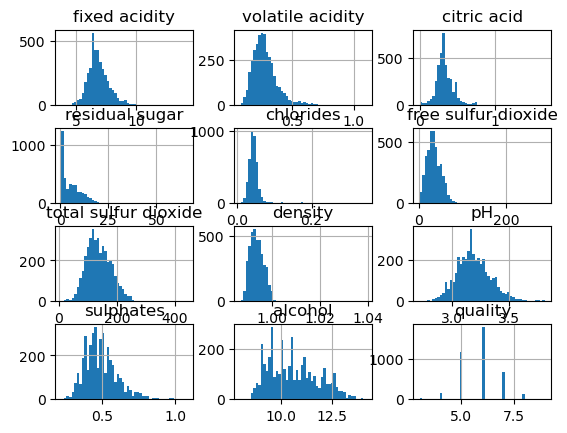

In [15]:
dfw.hist(bins = 50)

analyse descriptive white wine

In [10]:
dfw.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,3942.000000,3942.000000,3942.000000,3942.000000,3942.000000,3942.000000,3942.000000,3942.000000,3942.000000,3942.000000,3942.000000,3942.000000
mean,6.840297,0.280430,0.334490,5.918721,0.045887,34.918062,137.215753,0.993788,3.195287,0.490236,10.591945,5.855150
std,0.866067,0.103256,0.122404,4.861389,0.023088,17.227540,43.128509,0.002907,0.151345,0.113653,1.217787,0.890944
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.600000,0.035000,23.000000,106.000000,0.991600,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,4.700000,0.042000,33.000000,133.000000,0.993500,3.180000,0.480000,10.400000,6.000000
75%,7.300000,0.328750,0.390000,8.875000,0.050000,45.000000,166.000000,0.995710,3.290000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


Filtrage red wine

In [16]:
dfr = df[df['type']== "red"]
dfr.sample(10).sort_index()


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4903,red,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
4911,red,7.8,0.610,0.29,1.6,0.114,9.0,29.0,0.99740,3.26,1.56,9.1,5
4973,red,8.8,0.410,0.64,2.2,0.093,9.0,42.0,0.99860,3.54,0.66,10.5,5
5005,red,6.2,0.630,0.31,1.7,0.088,15.0,64.0,0.99690,3.46,0.79,9.3,5
5351,red,10.4,0.330,0.63,2.8,0.084,5.0,22.0,0.99980,3.26,0.74,11.2,7
5980,red,7.2,0.380,0.30,1.8,0.073,31.0,70.0,0.99685,3.42,0.59,9.5,6
6190,red,5.9,0.395,0.13,2.4,0.056,14.0,28.0,0.99362,3.62,0.67,12.4,6
6332,red,10.2,0.540,0.37,15.4,0.214,55.0,95.0,1.00369,3.18,0.77,9.0,6
6434,red,6.1,0.530,0.08,1.9,0.077,24.0,45.0,0.99528,3.60,0.68,10.3,6
6463,red,6.7,0.670,0.02,1.9,0.061,26.0,42.0,0.99489,3.39,0.82,10.9,6


histogramme red wine 

array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

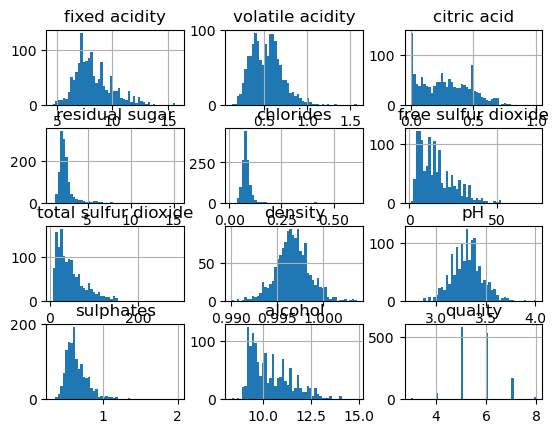

In [18]:
dfr.hist(bins = 50)

marrice de correlation generale

In [20]:
correl=df[[ 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality']].corr()

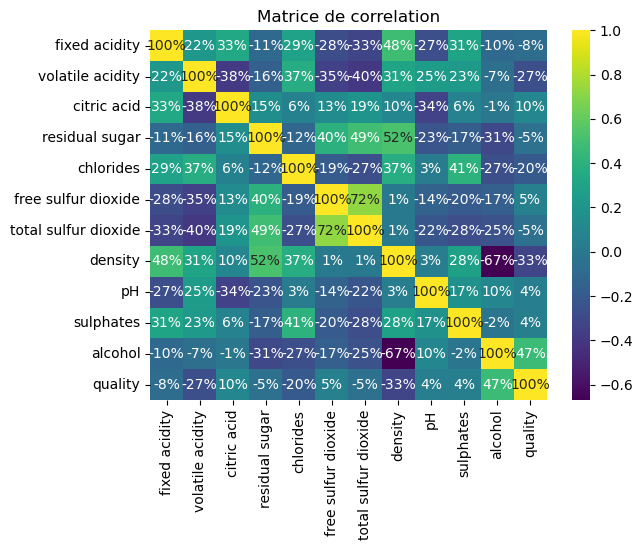

In [23]:
sns.heatmap(correl, annot=True, cmap="viridis", fmt=".0%")
plt.title("Matrice de correlation")
plt.show()

Scatter plot des donnee importantes


In [ ]:
filtered_dfr = df[df["type"] == 'red']
fig = px.scatter_matrix(
    filtered_dfr,
    dimensions=[
         'pH', 'alcohol', 'quality'
    ],
    title="Scatter Matrix des Red Wine",
    color="quality"  
)
fig.show()

In [32]:
filtered_dfw = df[df["type"] == 'white']
fig = px.scatter_matrix(
    filtered_dfw,
    dimensions=[
         'pH', 'alcohol', 'quality'
    ],
    title="Scatter Matrix des white Wine",
    color="quality"  
)
fig.show()

droite de regression lineaire X = PH et  y = qualité

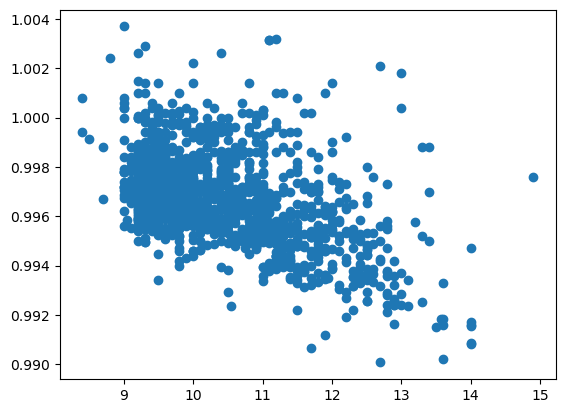

In [60]:
filtre_rouge = df[df["type"]== "red"]
x= filtre_rouge["alcohol"]
y= filtre_rouge[["density"]]
plt.scatter(x,y)

Modèle de régression : y = -0.00 * x + 1.01


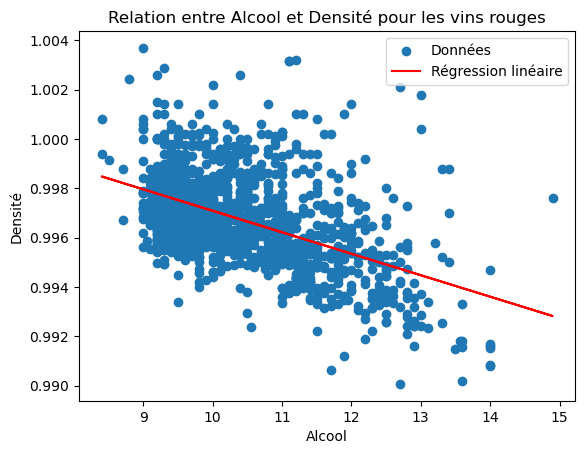

In [63]:


filtre_rouge = df[df["type"] == "red"]

x = filtre_rouge["alcohol"].values.reshape(-1, 1)  # Reshaper pour en faire une matrice 2D
y = filtre_rouge["density"].values  # Pas besoin de reshaper y

# Créer et ajuster le modèle de régression linéaire
model = LinearRegression()
model.fit(x, y)


slope, intercept = model.coef_[0], model.intercept_

# Afficher l'équation de la régression
print(f"Modèle de régression : y = {slope:.2f} * x + {intercept:.2f}")

# Optionnel : Tracer la droite de régression sur le graphique de dispersion
plt.scatter(x, y, label="Données")
plt.plot(x, model.predict(x), color='red', label="Régression linéaire")
plt.xlabel("Alcool")
plt.ylabel("Densité")
plt.title("Relation entre Alcool et Densité pour les vins rouges")
plt.legend()
plt.show()
